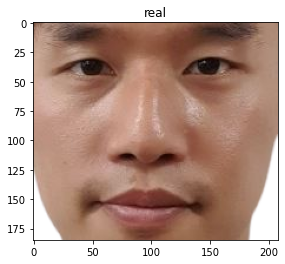

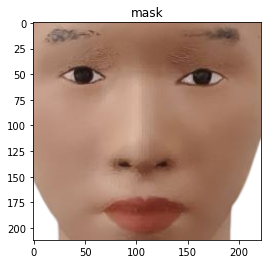

In [2]:
import cv2
import math
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

real_path = "/mnt/nas3/yrkim/liveness_lidar_project/GC_project/data/Paper/figure1_real_crop_white.png"
mask_path = "/mnt/nas3/yrkim/liveness_lidar_project/GC_project/data/Paper/figure1_mask_crop_white.png"

# print
real_image = Image.open(real_path)
mask_image = Image.open(mask_path)

plt.imshow(real_image)
plt.title("real")
plt.show()

plt.imshow(mask_image)
plt.title("mask")
plt.show()

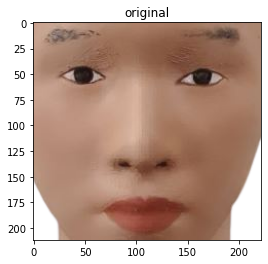

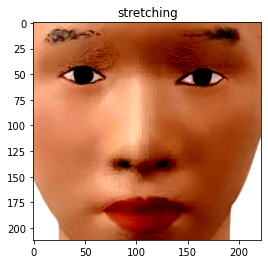

In [8]:
# Method to process the red band of the image

def normalizeRed(intensity):

    iI      = intensity
    minI    = 80 # 86 
    maxI    = 200 #230
    minO    = 0
    maxO    = 255

    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

# Method to process the green band of the image
def normalizeGreen(intensity):

    iI      = intensity
    minI    = 80 # 90
    maxI    = 200 #225
    minO    = 0
    maxO    = 255

    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

# Method to process the blue band of the image

def normalizeBlue(intensity):

    iI      = intensity
    minI    = 80 # 100
    maxI    = 200 # 210
    minO    = 0
    maxO    = 255

    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

# Create an image object

#imageObject     = Image.open(real_path)
imageObject     = Image.open(mask_path)

# Split the red, green and blue bands from the Image
multiBands      = imageObject.split()

# Apply point operations that does contrast stretching on each color band
normalizedRedBand      = multiBands[0].point(normalizeRed)
normalizedGreenBand    = multiBands[1].point(normalizeGreen)
normalizedBlueBand     = multiBands[2].point(normalizeBlue)

# Create a new image from the contrast stretched red, green and blue brands
normalizedImage = Image.merge("RGB", (normalizedRedBand, normalizedGreenBand, normalizedBlueBand))

plt.imshow(imageObject)
plt.title("original")
plt.show()

plt.imshow(normalizedImage)
plt.title("stretching")
plt.show()


In [14]:
def histogram_stretching(path, title):
    imageObject     = Image.open(path)

    # Split the red, green and blue bands from the Image
    multiBands      = imageObject.split()

    # Apply point operations that does contrast stretching on each color band
    normalizedRedBand      = multiBands[0].point(normalizeRed)
    normalizedGreenBand    = multiBands[1].point(normalizeGreen)
    normalizedBlueBand     = multiBands[2].point(normalizeBlue)

    # Create a new image from the contrast stretched red, green and blue brands
    normalizedImage = Image.merge("RGB", (normalizedRedBand, normalizedGreenBand, normalizedBlueBand))
    
    plt.imshow(imageObject)
    plt.title(f"{title} original")
    plt.show()

    plt.imshow(normalizedImage)
    plt.title(f"{title} stretching")
    plt.show()
    
    return normalizedImage


    

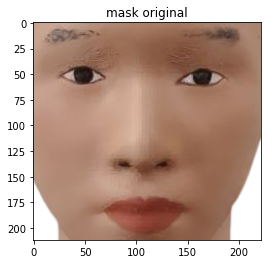

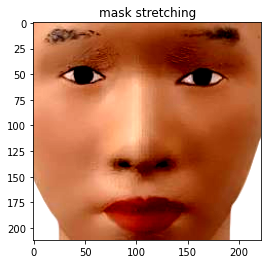

In [15]:
nn = histogram_stretching(mask_path, "mask")

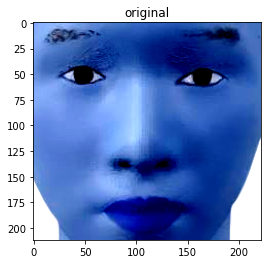

In [19]:
np_original = np.array(nn)
cv_original = cv2.cvtColor(np_original, cv2.COLOR_RGB2BGR)

#plt.imshow(Image.open(mask_path))
plt.imshow(cv_original)
plt.title("original")
plt.show()

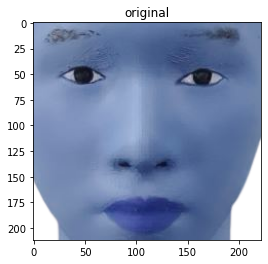

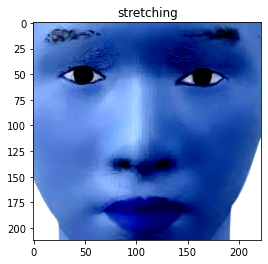

In [9]:
# PIL image to CV2

np_original = np.array(imageObject)
cv_original = cv2.cvtColor(np_original, cv2.COLOR_RGB2BGR)

plt.imshow(cv_original)
plt.title("original")
plt.show()


np_stretching = np.array(normalizedImage)
cv_stretching = cv2.cvtColor(np_stretching, cv2.COLOR_RGB2BGR)

plt.imshow(cv_stretching)
plt.title("stretching")
plt.show()